In [3]:
# Standard data science libraries
import numpy as np
import torch
# Visualization
import time
#plt.style.use('bmh')
from environment import MDP, generate_mdp
from PI import policy_iteration
from sampling import optimal_allocation
from KLB_TS import KLBTS
from BESPOKE import BESPOKE, n_min
import pickle
from plotfigures import load_compare_save, BESPOKE_SCvsNmin

## First Experiment:

In [ ]:
######### THE FOLLOWING CODE WAS USED TO GENERATE THE FIRST SMALL-SIZED MDP AND SAVE IT #########
# Ns = 2
# Na = 2
# gamma = 0.5
# phi = generate_mdp(Ns,Na,gamma=gamma)
# pi, V, Q = policy_iteration(phi)
# _,U,_,_,_,_ = optimal_allocation(phi,pi, V, Q)
# #computing delta_min of phi to reveal it to BESPOKE
# delta_phi = torch.zeros(Ns,Na,dtype=torch.float64)
# delta_phi = V - Q
# non_zero = torch.where(delta_phi !=0.0, delta_phi, (2/(1-gamma))*torch.ones(Ns,Na, dtype=torch.float64)) # looking for non null gaps
# delta_min = torch.min(non_zero) 
# minimax = Ns*Na/((delta_min**2)*((1-gamma)**3))
# print("KLB-TS asymptotic sample complexity (without the log delta) :", int(U.item()))
# print("Minimax sample complexity (without the log delta):" ,int(minimax.item()))
# with open("MDP_EASY.pkl","wb") as file:
#     pickle.dump(phi,file)

###  Loading a  small-size easy MDP( was randomly generated trough code above):

In [ ]:
# mdp_file = open("experiment_EASY.pkl", 'rb')
# phi = pickle.load(mdp_file)
# mdp_file.close()
# pi, V, Q = policy_iteration(phi)
# _,U,_,_,_,_ = optimal_allocation(phi,pi, V, Q)
# #computing delta_min of phi to reveal it to BESPOKE
# delta_phi = torch.zeros(Ns,Na,dtype=torch.float64)
# delta_phi = V - Q
# non_zero = torch.where(delta_phi !=0.0, delta_phi, (2/(1-gamma))*torch.ones(Ns,Na, dtype=torch.float64)) # looking for non null gaps
# delta_min = torch.min(non_zero) 

### Comparing BESPOKE and KLB-TS for different confidence levels :

In [ ]:
# N_experiments = 10
# DELTAS = [10**(-k) for k in range(1,15)]
# d = len(DELTAS)
# data={}
# accuracy = 0.9*delta_min # accuracy level of policy to be returned by bespoke (= epsilon)
# data["BESPOKE"] = { "complexity" : np.zeros((d,N_experiments)), "accurate": np.zeros((d,N_experiments))}
# data["KLB-TS"] = { "complexity" : np.zeros((d,N_experiments)), "accurate": np.zeros((d,N_experiments))}
# for k in range(d):
#     delta = DELTAS[k]
#     for n in range(N_experiments):
#         print("Confidence level (delta) = ", delta, " Experiment n°", n+1)
#         ##### KLB-TS part######
#         t0=time.time()
#         pi_hat,t,_ = KLBTS(phi,delta,period = 1e3)
#         print("KLB-TS run time = ", time.time()-t0)
#         data["KLB-TS"]["complexity"][k][n] = t
# #         data["KLB-TS"]["EARLIEST"][k][n] = EARLIEST
#         if torch.all(torch.eq(pi, pi_hat)) :
#             data["KLB-TS"]["accurate"][k][n] = 1 
            
#         ###### BESPOKE part ######
#         t0=time.time()
#         pi_hat,t = BESPOKE(phi,delta,accuracy) # note that we have revealed delta_min to BESPOKE
#         print("BESPOKE run time = ", time.time()-t0)
#         data["BESPOKE"]["complexity"][k][n] = t

#         if torch.all(torch.eq(pi, pi_hat)) :
#             data["BESPOKE"]["accurate"][k][n] = 1  

### Save experiment results

In [ ]:
## SAVE EXPERIMENT DATA
# data_file = open("experiment_"+name+".pkl", "wb")
# pickle.dump(data, data_file)
# data_file.close()

### Load data and plot:  

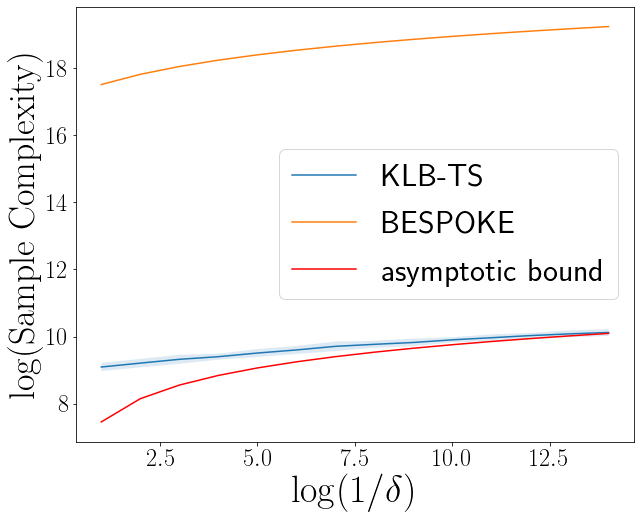

In [4]:
ALG_NAMES = ["KLB-TS","BESPOKE"]
DELTAS = [10**(-k) for k in range(1,15)]
load_compare_save('MDP_EASY.pkl', 'experiment_EASY.pkl', DELTAS, ALG_NAMES, "experimentEASY_01", log_scale=True)

### KLB-TS sample complexity vs asymptotic bound:

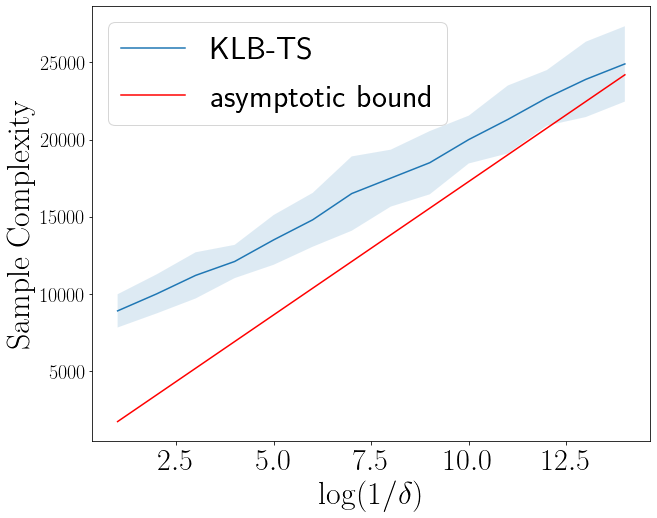

In [3]:
ALG_NAMES = ["KLB-TS","BESPOKE"]
DELTAS = [10**(-k) for k in range(1,15)]
load_compare_save('MDP_EASY.pkl', 'experiment_EASY.pkl', DELTAS, ALG_NAMES, "experimentEASY_02", log_scale=False)

### BESPOKE's total sample complexity vs it's initial number of samples

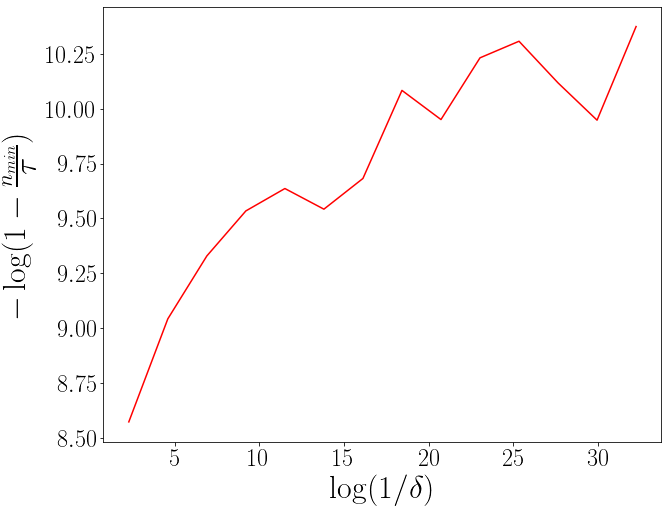

In [5]:
DELTAS = [10**(-k) for k in range(1,15)]
BESPOKE_SCvsNmin('MDP_EASY.pkl', 'experiment_EASY.pkl', DELTAS, "experiment_11")

## Second experiment:

###  Generating a  small-size difficult random MDP:

In [6]:
######### THE FOLLOWING CODE WAS USED TO GENERATE THE SECOND MEDIUM-SIZED MDP AND SAVE IT #########
# Ns = 5
# Na = 10
# gamma = 0.7
# phi = generate_mdp(Ns,Na,gamma=gamma)
# pi, V, Q = policy_iteration(phi)
# _,U,_,_,_,_ = optimal_allocation(phi,pi, V, Q)
# #computing delta_min of phi to reveal it to BESPOKE
# delta_phi = torch.zeros(Ns,Na,dtype=torch.float64)
# delta_phi = V - Q
# non_zero = torch.where(delta_phi !=0.0, delta_phi, (2/(1-gamma))*torch.ones(Ns,Na, dtype=torch.float64)) # looking for non null gaps
# delta_min = torch.min(non_zero) 
# minimax = Ns*Na/((delta_min**2)*((1-gamma)**3))
# print("KLB-TS asymptotic sample complexity (without the log delta) :", int(U.item()))
# print("Minimax sample complexity (without the log delta):" ,int(minimax.item()))
# name2 = "HARD_02" #  remember to change the name
# with open("MDP_"+name2+".pkl","wb") as file:
#     pickle.dump(phi,file)

###  Loading a  medium-size  MDP( which was randomly generated trough code above):

In [ ]:
# mdp_file = open("MDP_"+name2+".pkl", 'rb')
# phi = pickle.load(mdp_file)
# mdp_file.close()
# pi, V, Q = policy_iteration(phi)
# _,U,_,_,_,_ = optimal_allocation(phi,pi, V, Q)
# #computing delta_min of phi to reveal it to BESPOKE
# delta_phi = torch.zeros(Ns,Na,dtype=torch.float64)
# delta_phi = V - Q
# non_zero = torch.where(delta_phi !=0.0, delta_phi, (2/(1-gamma))*torch.ones(Ns,Na, dtype=torch.float64)) # looking for non null gaps
# delta_min = torch.min(non_zero) 

### Comparing BESPOKE and KLB-TS for different confidence levels :

In [ ]:
# N_experiments = 5
# DELTAS = [0.1,0.05,0.01,0.005,0.001]
# d = len(DELTAS)
# data={}
# accuracy = 0.9*delta_min # accuracy level of policy to be returned by bespoke (= epsilon)
# data["BESPOKE"] = { "complexity" : np.zeros((d,N_experiments)), "accurate": np.zeros((d,N_experiments))}
# data["KLB-TS"] = { "complexity" : np.zeros((d,N_experiments)), "accurate": np.zeros((d,N_experiments))}
# for k in range(d):
#     delta = DELTAS[k]
#     for n in range(N_experiments):
#         print("Confidence level (delta) = ", delta, " Experiment n°", n+1)
#         ##### KLB-TS part######
#         t0=time.time()
#         pi_hat,t,_ = KLBTS(phi,delta,period = 1e3)
#         print("KLB-TS run time = ", time.time()-t0)
#         data["KLB-TS"]["complexity"][k][n] = t
# #         data["KLB-TS"]["EARLIEST"][k][n] = EARLIEST
#         if torch.all(torch.eq(pi, pi_hat)) :
#             data["KLB-TS"]["accurate"][k][n] = 1 
            
#         ###### BESPOKE part ######
#         t0=time.time()
#         pi_hat,t = BESPOKE(phi,delta,accuracy) # note that we have revealed delta_min to BESPOKE
#         print("BESPOKE run time = ", time.time()-t0)
#         data["BESPOKE"]["complexity"][k][n] = t

#         if torch.all(torch.eq(pi, pi_hat)) :
#             data["BESPOKE"]["accurate"][k][n] = 1  

### Load Data and Plot:

In [ ]:
ALG_NAMES = ["KLB-TS","BESPOKE"]
DELTAS = [0.1,0.05,0.01,0.005,0.001]
load_compare_save('MDP_HARD.pkl', 'experiment_HARD.pkl', DELTAS, ALG_NAMES, "experiment_Hard_01", log_scale=True)

In [ ]:
ALG_NAMES = ["KLB-TS","BESPOKE"]
DELTAS = [0.1,0.05,0.01,0.005,0.001]
load_compare_save('MDP_HARD.pkl', 'experiment_HARD.pkl', DELTAS, ALG_NAMES, "experiment_Hard_02", log_scale=False)

## RIVERSWIM:

In [ ]:
### River swim MDP from Strehl and Littman (2004)
# Ns = 6
# Na = 2
# gamma = 0.95
# R = torch.zeros(Ns,Na,dtype=torch.float64) #(s,a)
# R[0,0] = 5/(10**4)
# R[5,1] = 1
# P = torch.zeros(Ns,Na,Ns,dtype=torch.float64) # (s,a,s')
# for i in range(1,5):
#     P[i,1,i+1] = 0.3
#     P[i,1,i] = 0.6
#     P[i,1,i-1] = 0.1
#     P[i,0,i] = 1.0
# P[0,1,0] = 0.7
# P[0,1,1] = 0.3
# P[0,0,0] = 1.0
# P[5,1,5] = 0.3
# P[5,1,4] = 0.7
# P[5,0,4] = 1.0
# phi = MDP(Ns,Na,P,R,gamma)
# pi, V, Q = policy_iteration(phi)
# _,U,_,_,_,_ = optimal_allocation(phi,pi, V, Q)
# #computing delta_min of phi to reveal it to BESPOKE
# delta_phi = torch.zeros(Ns,Na,dtype=torch.float64)
# delta_phi = V - Q
# non_zero = torch.where(delta_phi !=0.0, delta_phi, (2/(1-gamma))*torch.ones(Ns,Na, dtype=torch.float64)) # looking for non null gaps
# delta_min = torch.min(non_zero) 
# minimax = Ns*Na/((delta_min**2)*((1-gamma)**3))
# print("KLB-TS asymptotic sample complexity (without the log delta) :", int(U.item()))
# print("Minimax sample complexity (without the log delta):" ,int(minimax.item()))
# with open("RIVER_SWIM.pkl","wb") as file:
#     pickle.dump(phi,file)